<a href="https://colab.research.google.com/github/mohamed-alkasem/bilgi_guvenligi_final_odevi/blob/main/alkasemcifar-10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# تأكد من تشغيل هذا على Google Colab
!pip install tensorflow matplotlib scikit-learn

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# تحميل بيانات CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# نختار subset من البيانات (مثلاً 7000 صورة للتدريب و 1000 للصقل)
x_train, y_train = x_train[:7000], y_train[:7000]
x_test, y_test = x_test[:1000], y_test[:1000]

# تطبيع الصور بين 0 و 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# تحويل التسميات إلى one-hot encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [3]:
# تحميل نموذج VGG16 بدون الطبقة الأخيرة (include_top=False)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

# تجميد الطبقات الأساسية
for layer in base_model.layers:
    layer.trainable = False

# إضافة الطبقات الخاصة بنا
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

# إنشاء النموذج النهائي
model = Model(inputs=base_model.input, outputs=predictions)

# إعداد optimizer
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,982,474 (57.15 MB)

 Trainable params: 267,786 (1.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [4]:
# تدريب النموذج
history = model.fit(
    x_train, y_train_cat,
    validation_split=0.2,  # 20% validation
    epochs=20,
    batch_size=32,
    verbose=1
)


Epoch 1/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.1470 - loss: 2.3935 - val_accuracy: 0.3764 - val_loss: 1.9499
Epoch 2/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2947 - loss: 1.9846 - val_accuracy: 0.4229 - val_loss: 1.7737
Epoch 3/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3755 - loss: 1.7845 - val_accuracy: 0.4536 - val_loss: 1.6712
Epoch 4/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4021 - loss: 1.7075 - val_accuracy: 0.4814 - val_loss: 1.5938
Epoch 5/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4372 - loss: 1.6266 - val_accuracy: 0.4779 - val_loss: 1.5520
Epoch 6/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4562 - loss: 1.5687 - val_accuracy: 0.4964 - val_loss: 1.5070
Epoch 7/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4725 - loss: 1.5324 - val_accuracy: 0.5071 - val_loss: 1.4750
Epoch 8/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4814 - loss: 1.4908 - val_accuracy

In [5]:
# تقييم على test set
loss, accuracy = model.evaluate(x_test, y_test_cat)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# التنبؤ بالبيانات
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:\n", cm)

# تقرير التصنيف
report = classification_report(y_test, y_pred_classes)
print("Classification Report:\n", report)


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.5397 - loss: 1.3271
Test Loss: 1.3351, Test Accuracy: 0.5330
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step
Confusion Matrix:
 [[55  4  7  2  2  2  2  3 19  7]
 [ 4 46  4  2  4  8  1  0  1 19]
 [ 9  0 42  6 11 12  8  6  6  0]
 [ 6  5  8 41  6 18  8  3  0  8]
 [ 1  2  9  1 47  1  9 10  7  3]
 [ 0  1  5 11  5 47  6  8  0  3]
 [ 2  5 10  9  8 10 65  1  0  2]
 [ 2  2  6  8 10 13  1 56  1  3]
 [17  2  0  1  2  1  2  1 71  9]
 [ 6 13  2  3  3  4  3  5  7 63]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.53      0.54       103
           1       0.57      0.52      0.54        89
           2       0.45      0.42      0.44       100
           3       0.49      0.40      0.44       103
           4       0.48      0.52      0.50        90
           5       0.41      0.55      0.47        86
           6       0.62      0.58      0.60       112
           7       0.60      0.55    

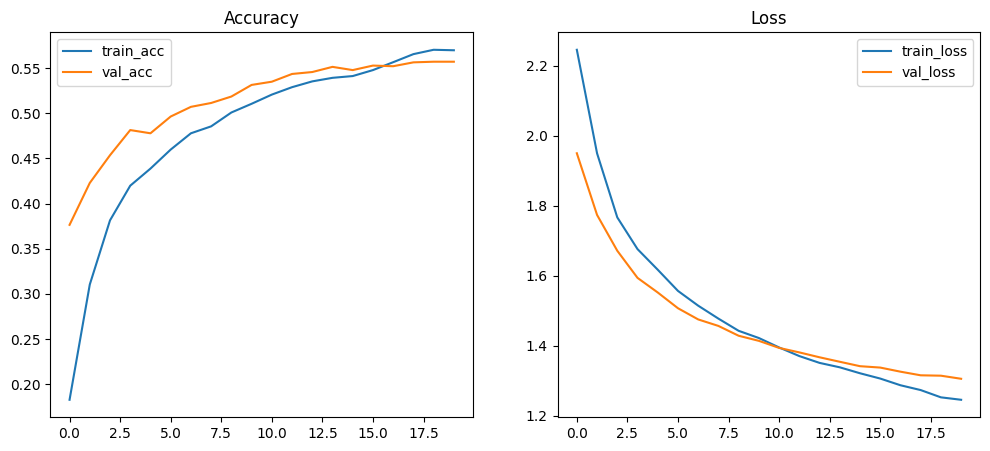

In [6]:
# رسم Accuracy و Loss
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.legend()

plt.show()
